In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
a = np.array([0,2.1,9.4,3.3,7.5,8.8])
b = np.array([9.7,9.5,5.2,3.5,5.1,6.0])
c = np.array([6.0,1.2,0.7,3.0,1.5,0])#a처음, c마지막은 0으로 처리
r = np.array([2.0,7.5,0.6,7.4,9.8,8.8])
gam,rho = np.zeros(6),np.zeros(6)

bet = b[0]
rho[0] = r[0]/bet
for i in range(1,6):
    gam[i-1]= c[i-1]/bet
    bet = b[i]-a[i]*gam[i-1]
    rho[i] = (r[i]-a[i]*rho[i-1])/bet



x = np.zeros(6)
x[5] = rho[5]
for i in range(4,-1,-1):
    x[i] = rho[i]-gam[i]*x[i+1]
print(rho,'\n',x)

[ 0.20618557  0.86172219 -1.96105757  4.7898635   9.78678388 -7.06468947] 
 [-0.48385952  1.11557288 -1.73486451 -1.23584238  5.81683373 -7.06468947]


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


[[0.07236905 0.14546179 0.21901915 ... 0.2391897  0.15976478 0.0799775 ]
 [0.0669546  0.13385506 0.20063945 ... 0.2096107  0.1399061  0.07000292]
 [0.06013752 0.12087642 0.18148553 ... 0.18681334 0.12443898 0.06190994]
 ...
 [0.01497593 0.03010162 0.04519821 ... 0.04523109 0.03012356 0.01498685]
 [0.0136554  0.02744735 0.04121276 ... 0.04123646 0.02746317 0.01366327]
 [0.01245112 0.02502675 0.03757817 ... 0.03759526 0.02503815 0.01245679]]


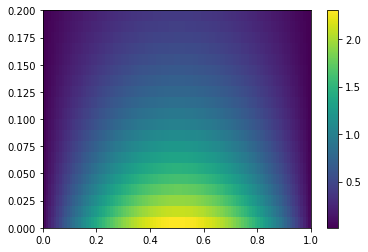

In [88]:
#heat equation
def heat(x):
    return 10*x*(1-x)
h = 0.01
alpha = 1/h
n = int(1/h)
J = np.zeros(int(1/h))
#N = np.zeros(int(1/h))
SOL = np.zeros((int(0.2*(1/h)),int(1/h)))
#D = 1
def calc(J,n):
    T_n = []
    for l in range(0,int(0.2*n)):
        if T_n ==[]:
            x = 0
            for j in range(0,n):
                T_n.append(heat(x))
                x+=1/n

            a = np.array([0]+[-1*alpha]*(n-1))
            b = np.array([1+2*alpha]*n)
            c = np.array([-1*alpha]*(n-1)+[0])
            gam,rho = np.zeros(n),T_n

            bet = b[0]
            rho[0] = T_n[0]/bet
            for i in range(1,n):
                gam[i-1]= c[i-1]/bet
                bet = b[i]-a[i]*gam[i-1]
                rho[i] = (T_n[i]-a[i]*rho[i-1])/bet

            x = np.zeros(n)
            x[n-1] = rho[n-1]
            for i in range(n-2,-1,-1):
                x[i] = rho[i]-gam[i]*x[i+1]
            #print(rho,'\n',x)
            for m in range(0,len(x)):
                SOL[l,m] = x[m]
            T_n = x
        else:
            a = np.array([0]+[-1*alpha]*(n-1))
            b = np.array([1+2*alpha]*n)
            c = np.array([-1*alpha]*(n-1)+[0])
            gam,rho = np.zeros(n),T_n

            bet = b[0]
            rho[0] = T_n[0]/bet
            for i in range(1,n):
                gam[i-1]= c[i-1]/bet
                bet = b[i]-a[i]*gam[i-1]
                rho[i] = (T_n[i]-a[i]*rho[i-1])/bet

            x = np.zeros(n)
            x[n-1] = rho[n-1]
            for i in range(n-2,-1,-1):
                x[i] = rho[i]-gam[i]*x[i+1]
            #print(rho,'\n',x)
            for m in range(0,len(x)):
                SOL[l,m] = x[m]
            x[0] = x[n-1] = 0
            T_n = x
    print(SOL)
    plt.imshow(SOL,extent=[0,1,0,0.2],origin='lower',aspect='auto')
    plt.colorbar()
calc(J,n)

In [86]:
#optimization
#golden section search
a,b,R = -3,-1,0.618
tol = 1e-4

def F(x):
    return x*(x-2)*(x+2)**2
iter = 0
while (b-a)>tol:
    x1 = b-R*(b-a)
    f1 = F(x1)
    x2 = a+R*(b-a)
    f2 = F(x2)
    iter+=1
    if f1>f2:
        a = x1
    else:
        b = x2
print(a,iter)

-2.000054255761773 21


In [95]:
#minimization
import scipy.optimize as opt

def F(x):
    return x*(x-2)*(x+2)**2
res = opt.minimize_scalar(F,bounds = (-3,-1),method = 'Brent')
print(res,'\n')
#Brent는 아예 bounded가 안먹히는듯
res1 = opt.minimize_scalar(F,method = 'Brent')
print(res1)

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458 

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458


In [114]:
def F(T):
    return -4*np.sin(T)*(1-np.cos(T))
def FP(T):
    return -4*(np.cos(T)*(1+np.cos(T))-np.sin(T)**2)
def FPP(T):
    return 4*np.sin(T)*(1+4*np.cos(T))
'''def TF(TH,T):
    return F(T)+FP(T)*(TH-T)+0.5*FPP(T)*(TH-T)**2'''

iter,tol = 0,1e-5
def NM(t_0,it):
    x_k = t_0
    it+=1
    x_k1 = x_k-FP(x_k)/FPP(x_k)
    if np.abs(x_k1-x_k)<tol:
        return x_k1,it
    else:
        return NM(x_k1,it)
NM(1.5,iter)
# global minimum에 수렴하지는 않는다..

(1.0471975511965974, 4)

In [121]:
#2d Newton
def F(x,y):
    return 100*(y-x**2)**2+(1-x)**2
def Hes(x,y):
    H = [[-400*y+1200*x**2+2,-400*x],[-400*x,200]]
    df = [-400*x*(y-x**2)-2*(1-x),200*(y-x**2)]
    return H,df
def S(x,y):
    det = (Hes(x,y)[0][0][0]*Hes(x,y)[0][1][1]-Hes(x,y)[0][1][0]*Hes(x,y)[0][0][1])
    s0 = 1/det*(Hes(x,y)[0][1][0]*Hes(x,y)[1][1]-Hes(x,y)[0][1][1]*Hes(x,y)[1][0])
    s1 = 1/det*(Hes(x,y)[0][0][1]*Hes(x,y)[1][0]-Hes(x,y)[0][0][0]*Hes(x,y)[1][1])
    return s0,s1

iter = 0
def NM2(x,y,it):
    x_k0,y_k0 = x,y
    it+=1
    x_k1,y_k1 = x_k0+S(x_k0,y_k0)[0],y_k0+S(x_k0,y_k0)[1]
    if np.sqrt((x_k1-x_k0)**2+(y_k1-y_k0)**2)<1e-5:
        return x_k1,y_k1,it
    else:
        return NM2(x_k1,y_k1,it)
NM2(-5,2,iter)

(1.0, 1.0, 5)